In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#import the necessary libraries for logictic regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# For metrics and helpful functions
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

# import packages for visualizations
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

iris = datasets.load_iris()
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

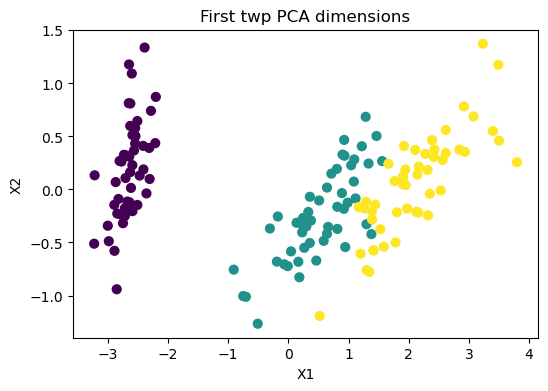

In [3]:
from sklearn.decomposition import PCA

X_reduced = PCA(n_components=2).fit_transform(iris.data)

fig = plt.figure(1, figsize=(6, 4))
ax = fig.add_subplot()
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    c=iris.target,
    s=40,
)

#plt.legend(iris.target_names)

ax.set_title("First twp PCA dimensions")
ax.set_xlabel("X1")
#ax.xaxis.set_ticklabels([])
ax.set_ylabel("X2")
#ax.yaxis.set_ticklabels([])

plt.show()


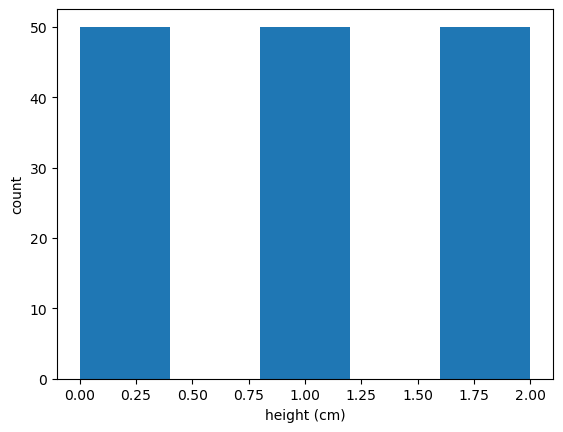

In [4]:
y = iris.target
plt.hist(y, bins=5)
#plt.set_xticklabels(iris.target_names)
plt.xlabel('height (cm)');
plt.ylabel('count');

In [5]:
multinomialLRmodel = LogisticRegression(C=1e5, multi_class='multinomial', solver='newton-cg').fit(X_reduced, y.ravel())

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [6]:
multinomialLRmodel.coef_

array([[-8.52576178,  4.45715833],
       [-0.42779509,  1.29315547],
       [ 8.95355687, -5.7503138 ]])

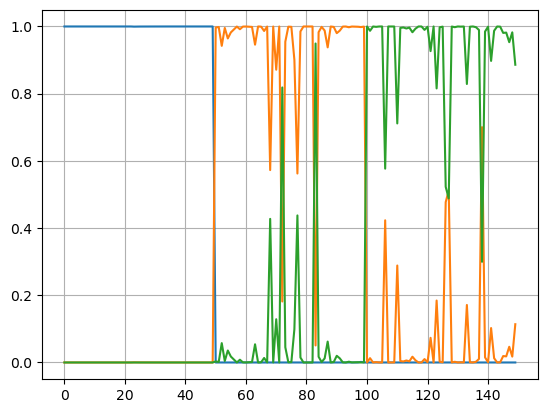

In [7]:
P = multinomialLRmodel.predict_proba(X_reduced)
plt.plot(P)
plt.grid('on')

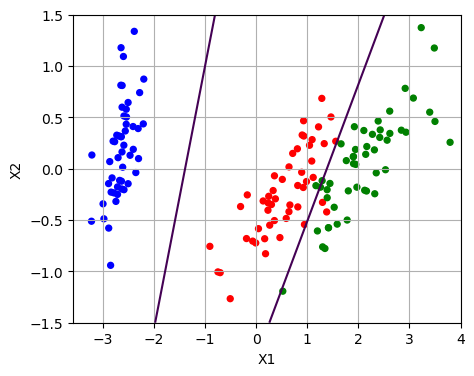

In [8]:
k1 = 200
k2 = 200

X1 = np.linspace(-3,4,k1)
X2 = np.linspace(-1.5,1.5,k2)

probs = np.zeros([k2,k1])
for i in range(k2):
    for j in range(k1):
        probs[i,j] = multinomialLRmodel.predict_proba([[ X1[j], X2[i] ]])[0,1]

plt.figure(figsize=(5,4))

colors = np.array(['blue', 'red', 'green'])
plt.scatter(X_reduced[:,0],X_reduced[:,1], s=18, c=colors[y.astype(int)])

contour = plt.contour(X1, X2, probs, levels = [.5])

#plt.colorbar(contour, label='probability')

plt.ylabel('X2');
plt.xlabel('X1');
plt.grid('on')


# Displaying the plot
plt.show()


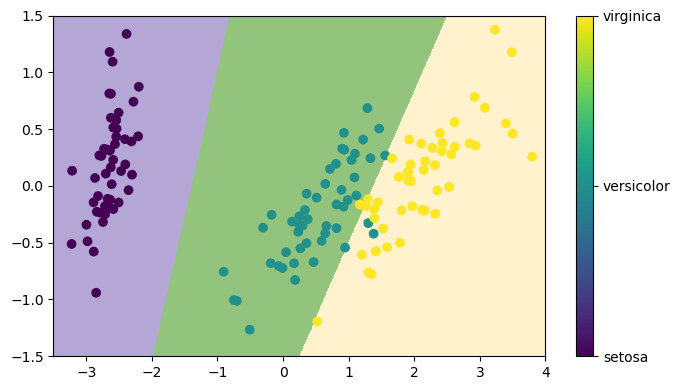

In [9]:
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#b4a7d6','#93c47d','#fff2cc'])

formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

k1 = 500
k2 = 500

X1 = np.linspace(-3.5,4,k1)
X2 = np.linspace(-1.5,1.5,k2)

x1,x2 = np.meshgrid(X1,X2)

X_new = np.c_[x1.ravel(), x2.ravel()]
y_pred = multinomialLRmodel.predict(X_new)
zz = y_pred.reshape(x1.shape)

plt.figure(figsize=(7, 4))
plt.contourf(x1, x2, zz, cmap=custom_cmap)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)

plt.tight_layout()
plt.show()